<a href="https://colab.research.google.com/github/eder-ferreira/gestao_ciencia_dados/blob/main/Spark_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregamento de Dados

In [ ]:
# Passo 1: Instalar Java e Spark
# instalar as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
# Passo 2: Definir Variáveis de Ambiente
# Conectar ao ambiente de execução
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

import findspark
findspark.init()

## Acessando o Spark UI (Google Colab)

In [ ]:
# Passo 3: Inicializar SparkSession
# Cria uma sessão do Spark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Iniciando com Spark") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

In [ ]:
# Passo 4: Verificar Instalação do Spark
spark.version

'3.1.2'

In [ ]:
# Passo 5: conexão do SparkUI usando o Ngrok
# usar o Ngrok para acessar o SparkUI no Google Colab

!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [10]:
# Passo 6: Importar o Ngrok para o projeto
# Instala o Ngrok para acessar o Spark UI no Google Colab.

# Importar o pyngrok
!pip install pyngrok
from pyngrok import ngrok

# Inserir seu token
!ngrok authtoken "2iTbbO2nKhjPS0KUYWiNJehKgaZ_5VHNZJ3wUAUbToHk5Yc9h"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [11]:
# Passo 7: Conectar Ngrok
# Conecta o Ngrok à porta 4050, permitindo acessar o Spark UI remotamente.

ngrok.connect('4050')

<NgrokTunnel: "https://8828-34-139-177-112.ngrok-free.app" -> "http://localhost:4050">

## Montando o drive

In [12]:
# Passo 8: Monta o Google Drive para acessar arquivos de dados
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Passo 9: Extrai os dados do Titanic de um arquivo ZIP no Google Drive.
import zipfile

zipfile.ZipFile('/content/drive/MyDrive/UFMT/spark_titanic/TitanicDataset.zip','r').extractall('/content/drive/MyDrive/UFMT/spark_titanic/')

## Carregando os dados

In [14]:
# Passo 10: Carrega os dados do Titanic em um DataFrame do Spark.

# Definir o caminho do arquivo

path = '/content/drive/MyDrive/UFMT/spark_titanic/TitanicDataset.csv'

# Carregar o arquivo CSV no Spark DataFrame
TitanicDataset = spark.read.csv(path, header=True, sep=',', inferSchema=True)

# Mostrar as primeiras linhas do DataFrame
TitanicDataset.show()

# Contar o número total de registros
cont_dataset = TitanicDataset.count()
print("Total de registros =>", cont_dataset)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

## Analisando os dados

In [15]:
# Mostrar o Schema
TitanicDataset.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



## Manipulando os dados

In [16]:
# Definir a lista de novos nomes de colunas
titanicColNames = ["IDpassageiro", "Sobrevivente", "ClassePassagem", "Nome", "Genero", "Idade",
                   "NrIrmaosConjuges", "NrPaisFilhos", "NrTicket", "Tarifa", "Cabine", "PortoEmbarque"]

# Renomear as colunas do DataFrame
for old_name, new_name in zip(TitanicDataset.columns, titanicColNames):
    TitanicDataset = TitanicDataset.withColumnRenamed(old_name, new_name)

# Mostrar as primeiras linhas do DataFrame com os novos nomes de colunas
TitanicDataset.show()

+------------+------------+--------------+--------------------+------+-----+----------------+------------+----------------+-------+------+-------------+
|IDpassageiro|Sobrevivente|ClassePassagem|                Nome|Genero|Idade|NrIrmaosConjuges|NrPaisFilhos|        NrTicket| Tarifa|Cabine|PortoEmbarque|
+------------+------------+--------------+--------------------+------+-----+----------------+------------+----------------+-------+------+-------------+
|           1|           0|             3|Braund, Mr. Owen ...|  male| 22.0|               1|           0|       A/5 21171|   7.25|  null|            S|
|           2|           1|             1|Cumings, Mrs. Joh...|female| 38.0|               1|           0|        PC 17599|71.2833|   C85|            C|
|           3|           1|             3|Heikkinen, Miss. ...|female| 26.0|               0|           0|STON/O2. 3101282|  7.925|  null|            S|
|           4|           1|             1|Futrelle, Mrs. Ja...|female| 35.0|      

In [17]:
# Mostrar o DtaFrame no pandas
TitanicDataset.limit(5).toPandas()

,IDpassageiro,Sobrevivente,ClassePassagem,Nome,Genero,Idade,NrIrmaosConjuges,NrPaisFilhos,NrTicket,Tarifa,Cabine,PortoEmbarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


## Modificando os tipos de dados

In [18]:
from pyspark.sql.functions import col, when, round

# Converter a coluna 'Idade' para inteiro
TitanicDataset = TitanicDataset.withColumn("Idade", col("Idade").cast("integer"))

# Mostrar o Schema
TitanicDataset.printSchema()
TitanicDataset.show()


root
 |-- IDpassageiro: integer (nullable = true)
 |-- Sobrevivente: integer (nullable = true)
 |-- ClassePassagem: integer (nullable = true)
 |-- Nome: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Idade: integer (nullable = true)
 |-- NrIrmaosConjuges: integer (nullable = true)
 |-- NrPaisFilhos: integer (nullable = true)
 |-- NrTicket: string (nullable = true)
 |-- Tarifa: double (nullable = true)
 |-- Cabine: string (nullable = true)
 |-- PortoEmbarque: string (nullable = true)

+------------+------------+--------------+--------------------+------+-----+----------------+------------+----------------+-------+------+-------------+
|IDpassageiro|Sobrevivente|ClassePassagem|                Nome|Genero|Idade|NrIrmaosConjuges|NrPaisFilhos|        NrTicket| Tarifa|Cabine|PortoEmbarque|
+------------+------------+--------------+--------------------+------+-----+----------------+------------+----------------+-------+------+-------------+
|           1|           0|    

In [19]:
# Renomeando a coluna genero (masculino e feminino)
TitanicDataset = TitanicDataset.withColumn("Genero", when(col("Genero") == "male", "masculino")
                                           .when(col("Genero") == "female", "feminino")
                                           .otherwise(col("Genero")))

# Renomeando a coluna ClassePassagem
TitanicDataset = TitanicDataset.withColumn("ClassePassagem",
                                           when(col("ClassePassagem") == "1", "1°classe")
                                           .when(col("ClassePassagem") == "2", "2°classe")
                                           .when(col("ClassePassagem") == "3", "3°classe")
                                           .otherwise(col("ClassePassagem")))

# Renomeando PortoEmbarque (C = Cherbourg - Q = Queenstown - S = Southampton)
TitanicDataset = TitanicDataset.withColumn("PortoEmbarque",
                                           when(col("PortoEmbarque") == "S", "southampton")
                                           .when(col("PortoEmbarque") == "C", "cherbourg")
                                           .when(col("PortoEmbarque") == "Q", "queenstown")
                                           .otherwise(col("PortoEmbarque")))

# Truncando a Tarifa para duas casas
TitanicDataset = TitanicDataset.withColumn("Tarifa", round(col("Tarifa"), 2))


# Renomeando a coluna Sobrevivente (0 = não_sobreviveu e 1 = sobreviveu)
TitanicDataset = TitanicDataset.withColumn("Sobrevivente", when(col("Sobrevivente") == "0", "não_sobreviveu")
                                           .when(col("Sobrevivente") == "1", "sobreviveu")
                                           .otherwise(col("Sobrevivente")))

# Mostrar os dados
TitanicDataset.show()

+------------+--------------+--------------+--------------------+---------+-----+----------------+------------+----------------+------+------+-------------+
|IDpassageiro|  Sobrevivente|ClassePassagem|                Nome|   Genero|Idade|NrIrmaosConjuges|NrPaisFilhos|        NrTicket|Tarifa|Cabine|PortoEmbarque|
+------------+--------------+--------------+--------------------+---------+-----+----------------+------------+----------------+------+------+-------------+
|           1|não_sobreviveu|      3°classe|Braund, Mr. Owen ...|masculino|   22|               1|           0|       A/5 21171|  7.25|  null|  southampton|
|           2|    sobreviveu|      1°classe|Cumings, Mrs. Joh...| feminino|   38|               1|           0|        PC 17599| 71.28|   C85|    cherbourg|
|           3|    sobreviveu|      3°classe|Heikkinen, Miss. ...| feminino|   26|               0|           0|STON/O2. 3101282|  7.93|  null|  southampton|
|           4|    sobreviveu|      1°classe|Futrelle, Mrs.

## Identificando valores nulos

In [20]:
from pyspark.sql.functions import col, count, isnan, when

# Contar valores nulos em cada coluna
TitanicDataset.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in TitanicDataset.columns]).show()

+------------+------------+--------------+----+------+-----+----------------+------------+--------+------+------+-------------+
|IDpassageiro|Sobrevivente|ClassePassagem|Nome|Genero|Idade|NrIrmaosConjuges|NrPaisFilhos|NrTicket|Tarifa|Cabine|PortoEmbarque|
+------------+------------+--------------+----+------+-----+----------------+------------+--------+------+------+-------------+
|           0|           0|             0|   0|     0|  177|               0|           0|       0|     0|   687|            2|
+------------+------------+--------------+----+------+-----+----------------+------------+--------+------+------+-------------+



In [21]:
# Calcular estatísticas descritivas para todas as colunas
TitanicDataset.describe().show()

+-------+-----------------+--------------+--------------+--------------------+---------+------------------+------------------+-------------------+------------------+-----------------+------+-------------+
|summary|     IDpassageiro|  Sobrevivente|ClassePassagem|                Nome|   Genero|             Idade|  NrIrmaosConjuges|       NrPaisFilhos|          NrTicket|           Tarifa|Cabine|PortoEmbarque|
+-------+-----------------+--------------+--------------+--------------------+---------+------------------+------------------+-------------------+------------------+-----------------+------+-------------+
|  count|              891|           891|           891|                 891|      891|               714|               891|                891|               891|              891|   204|          889|
|   mean|            446.0|          null|          null|                null|     null|29.679271708683473|0.5230078563411896|0.38159371492704824|260318.54916792738|32.205016835016

## Filtrando dados

In [22]:
from pyspark.sql import functions as F

# Contar sobreviventes e não sobreviventes por gênero
contagem_sobreviventes = TitanicDataset.groupBy('Genero').agg(
    F.sum(F.when(col('Sobrevivente') == "sobreviveu", 1).otherwise(0)).alias('Sobreviventes'),
    F.sum(F.when(col('Sobrevivente') == "não_sobreviveu", 1).otherwise(0)).alias('Não Sobreviventes')
)

# Mostrar o resultado
contagem_sobreviventes.show()

+---------+-------------+-----------------+
|   Genero|Sobreviventes|Não Sobreviventes|
+---------+-------------+-----------------+
|masculino|          109|              468|
| feminino|          233|               81|
+---------+-------------+-----------------+



## Sumarizando os dados

In [23]:
# Contar o número de registros por classe de passagem
contagem_por_classe = TitanicDataset.groupBy('ClassePassagem').count()

# Mostrar o resultado
contagem_por_classe.show()


+--------------+-----+
|ClassePassagem|count|
+--------------+-----+
|      3°classe|  491|
|      2°classe|  184|
|      1°classe|  216|
+--------------+-----+



## Visualização Grafica

In [24]:
!pip install matplotlib seaborn pandas

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
# Converte o DataFrame Spark para Pandas DataFrame
titanic_df = TitanicDataset.toPandas()

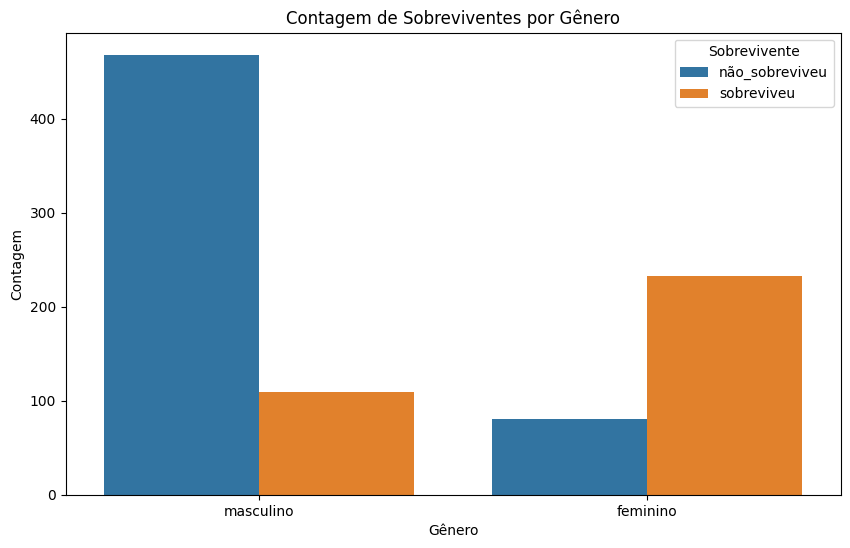

In [27]:
# Gráfico de Barras: Contagem de Sobreviventes por Gênero
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Genero', hue='Sobrevivente')
plt.title('Contagem de Sobreviventes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Sobrevivente')
plt.show()

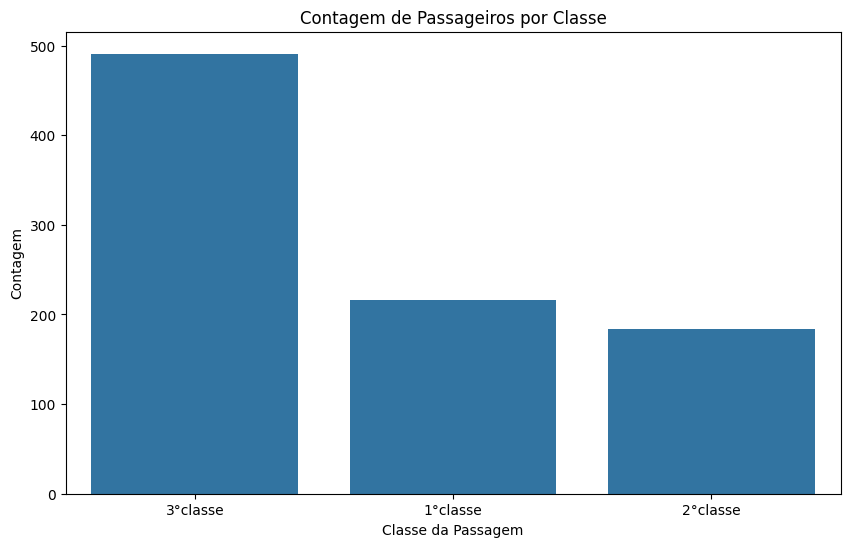

In [28]:
# Gráfico de Barras: Contagem de Passageiros por Classe
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='ClassePassagem')
plt.title('Contagem de Passageiros por Classe')
plt.xlabel('Classe da Passagem')
plt.ylabel('Contagem')
plt.show()

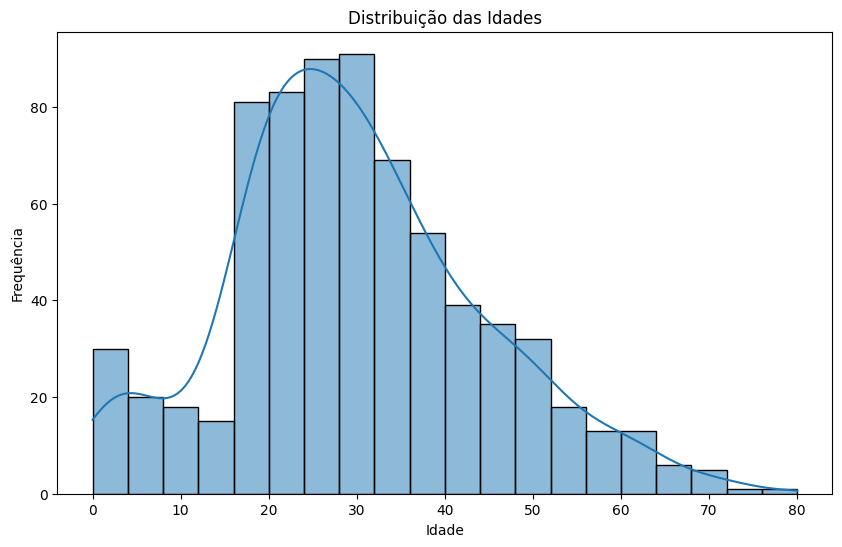

In [29]:
# Histograma: Distribuição das Idades
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Idade', kde=True)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

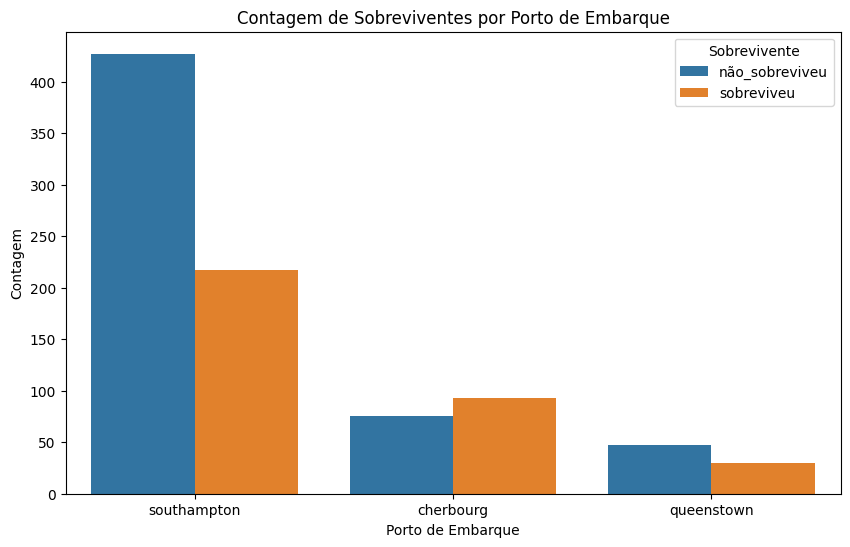

In [30]:
# Gráfico de Barras: Contagem de Sobreviventes por Porto de Embarque
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='PortoEmbarque', hue='Sobrevivente')
plt.title('Contagem de Sobreviventes por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Contagem')
plt.legend(title='Sobrevivente')
plt.show()

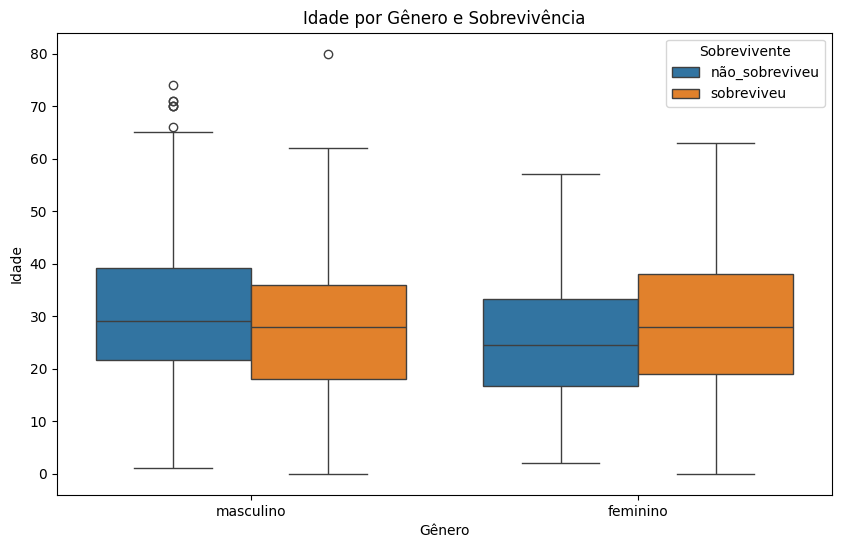

In [31]:
# Boxplot: Idade por Gênero e Sobrevivência
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df, x='Genero', y='Idade', hue='Sobrevivente')
plt.title('Idade por Gênero e Sobrevivência')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.legend(title='Sobrevivente')
plt.show()

## Spark SQl

In [35]:
TitanicDataset.createOrReplaceTempView("titanicView")

In [34]:
spark.sql("SELECT*FROM titanicView").show(5)

+------------+--------------+--------------+--------------------+---------+-----+----------------+------------+----------------+------+------+-------------+
|IDpassageiro|  Sobrevivente|ClassePassagem|                Nome|   Genero|Idade|NrIrmaosConjuges|NrPaisFilhos|        NrTicket|Tarifa|Cabine|PortoEmbarque|
+------------+--------------+--------------+--------------------+---------+-----+----------------+------------+----------------+------+------+-------------+
|           1|não_sobreviveu|      3°classe|Braund, Mr. Owen ...|masculino|   22|               1|           0|       A/5 21171|  7.25|  null|  southampton|
|           2|    sobreviveu|      1°classe|Cumings, Mrs. Joh...| feminino|   38|               1|           0|        PC 17599| 71.28|   C85|    cherbourg|
|           3|    sobreviveu|      3°classe|Heikkinen, Miss. ...| feminino|   26|               0|           0|STON/O2. 3101282|  7.93|  null|  southampton|
|           4|    sobreviveu|      1°classe|Futrelle, Mrs.

In [33]:
spark\
.sql("""
    SELECT *
    FROM titanicView
    WHERE Idade = 0

""")\
.show()

+------------+------------+--------------+--------------------+---------+-----+----------------+------------+--------+------+-------+-------------+
|IDpassageiro|Sobrevivente|ClassePassagem|                Nome|   Genero|Idade|NrIrmaosConjuges|NrPaisFilhos|NrTicket|Tarifa| Cabine|PortoEmbarque|
+------------+------------+--------------+--------------------+---------+-----+----------------+------------+--------+------+-------+-------------+
|          79|  sobreviveu|      2°classe|Caldwell, Master....|masculino|    0|               0|           2|  248738|  29.0|   null|  southampton|
|         306|  sobreviveu|      1°classe|Allison, Master. ...|masculino|    0|               1|           2|  113781|151.55|C22 C26|  southampton|
|         470|  sobreviveu|      3°classe|Baclini, Miss. He...| feminino|    0|               2|           1|    2666| 19.26|   null|    cherbourg|
|         645|  sobreviveu|      3°classe|Baclini, Miss. Eu...| feminino|    0|               2|           1|   

## Armazenando em CSV

In [36]:
# Escreve o DataFrame atualizado em um novo arquivo CSV
TitanicDataset.write.csv(
    path='/content/drive/MyDrive/UFMT/spark_titanic/csv',
    mode='overwrite',
    sep=';',
    header=True
)

In [37]:
# Carregar o arquivo CSV no Spark DataFrame
TitanicDataset2 = spark.read.csv(
    '/content/drive/MyDrive/UFMT/spark_titanic/csv',  # Certifique-se de que este é o caminho correto
    sep=';',
    inferSchema=True,
    header=True
)

# Mostrar o Schema do novo DataFrame
TitanicDataset2.printSchema()

root
 |-- IDpassageiro: integer (nullable = true)
 |-- Sobrevivente: string (nullable = true)
 |-- ClassePassagem: string (nullable = true)
 |-- Nome: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Idade: integer (nullable = true)
 |-- NrIrmaosConjuges: integer (nullable = true)
 |-- NrPaisFilhos: integer (nullable = true)
 |-- NrTicket: string (nullable = true)
 |-- Tarifa: double (nullable = true)
 |-- Cabine: string (nullable = true)
 |-- PortoEmbarque: string (nullable = true)



## Armazenando em Parquet

In [38]:
# Salvar o DataFrame atualizado em um novo arquivo Parquet
TitanicDataset.write.parquet(
    path='/content/drive/MyDrive/UFMT/spark_titanic/parquet',
    mode='overwrite',
)

In [39]:
# Carregar o arquivo Parquet no Spark DataFrame
TitanicDataset2 = spark.read.parquet('/content/drive/MyDrive/UFMT/spark_titanic/parquet')

# Mostrar o Schema do novo DataFrame
TitanicDataset2.printSchema()

# Mostrar as primeiras linhas do DataFrame
TitanicDataset2.show()

root
 |-- IDpassageiro: integer (nullable = true)
 |-- Sobrevivente: string (nullable = true)
 |-- ClassePassagem: string (nullable = true)
 |-- Nome: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Idade: integer (nullable = true)
 |-- NrIrmaosConjuges: integer (nullable = true)
 |-- NrPaisFilhos: integer (nullable = true)
 |-- NrTicket: string (nullable = true)
 |-- Tarifa: double (nullable = true)
 |-- Cabine: string (nullable = true)
 |-- PortoEmbarque: string (nullable = true)

+------------+--------------+--------------+--------------------+---------+-----+----------------+------------+----------------+------+------+-------------+
|IDpassageiro|  Sobrevivente|ClassePassagem|                Nome|   Genero|Idade|NrIrmaosConjuges|NrPaisFilhos|        NrTicket|Tarifa|Cabine|PortoEmbarque|
+------------+--------------+--------------+--------------------+---------+-----+----------------+------------+----------------+------+------+-------------+
|           1|não_sob

## Particionamento de dados

In [40]:
# Salvar o DataFrame atualizado em um novo arquivo Parquet, particionado por 'Genero'
TitanicDataset.write.parquet(
    path='/content/drive/MyDrive/UFMT/spark_titanic/parquet_particionado',
    mode='overwrite',
    partitionBy='Genero'
)

In [41]:
# Carregar o arquivo Parquet particionado no Spark DataFrame
TitanicDatasetParticionado = spark.read.parquet('/content/drive/MyDrive/UFMT/spark_titanic/parquet_particionado')

# Mostrar as primeiras linhas do DataFrame
TitanicDatasetParticionado.show()


+------------+--------------+--------------+--------------------+-----+----------------+------------+----------+------+-----------+-------------+---------+
|IDpassageiro|  Sobrevivente|ClassePassagem|                Nome|Idade|NrIrmaosConjuges|NrPaisFilhos|  NrTicket|Tarifa|     Cabine|PortoEmbarque|   Genero|
+------------+--------------+--------------+--------------------+-----+----------------+------------+----------+------+-----------+-------------+---------+
|           1|não_sobreviveu|      3°classe|Braund, Mr. Owen ...|   22|               1|           0| A/5 21171|  7.25|       null|  southampton|masculino|
|           5|não_sobreviveu|      3°classe|Allen, Mr. Willia...|   35|               0|           0|    373450|  8.05|       null|  southampton|masculino|
|           6|não_sobreviveu|      3°classe|    Moran, Mr. James| null|               0|           0|    330877|  8.46|       null|   queenstown|masculino|
|           7|não_sobreviveu|      1°classe|McCarthy, Mr. Tim...

In [42]:
# Carregar apenas os dados particionados pelo valor 'Feminino' na coluna 'Genero'

# Filtrar os dados para obter apenas as linhas onde 'Genero' é 'Feminino'
feminino_df = TitanicDatasetParticionado.filter(TitanicDatasetParticionado.Genero == 'feminino')

# Mostrar o Schema do novo DataFrame
feminino_df.printSchema()

# Mostrar as primeiras linhas do DataFrame
feminino_df.show()

root
 |-- IDpassageiro: integer (nullable = true)
 |-- Sobrevivente: string (nullable = true)
 |-- ClassePassagem: string (nullable = true)
 |-- Nome: string (nullable = true)
 |-- Idade: integer (nullable = true)
 |-- NrIrmaosConjuges: integer (nullable = true)
 |-- NrPaisFilhos: integer (nullable = true)
 |-- NrTicket: string (nullable = true)
 |-- Tarifa: double (nullable = true)
 |-- Cabine: string (nullable = true)
 |-- PortoEmbarque: string (nullable = true)
 |-- Genero: string (nullable = true)

+------------+--------------+--------------+--------------------+-----+----------------+------------+----------------+------+------+-------------+--------+
|IDpassageiro|  Sobrevivente|ClassePassagem|                Nome|Idade|NrIrmaosConjuges|NrPaisFilhos|        NrTicket|Tarifa|Cabine|PortoEmbarque|  Genero|
+------------+--------------+--------------+--------------------+-----+----------------+------------+----------------+------+------+-------------+--------+
|           2|    sobrev